In [32]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
transform = transforms.ToTensor()

batch_size = 128

trainset = torchvision.datasets.MNIST(
    root="../data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root="../data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

print("trainset:", len(trainset))
print("testset:", len(testset))


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 126866999.41it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 4923214.54it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 36271333.33it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10165703.72it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

trainset: 60000
testset: 10000


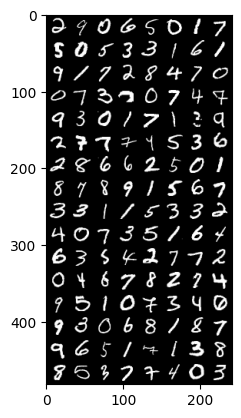

2 9 0 6 5 0 1 7 5 0 5 3 3 1 6 1 9 1 7 2 8 4 7 0 0 7 3 7 0 7 4 7 9 3 0 1 7 1 3 9 2 7 7 7 4 5 3 6 2 8 6 6 2 5 0 1 8 7 8 9 1 5 6 7 3 3 1 1 5 3 3 2 4 0 7 3 5 1 6 4 6 3 5 4 2 7 7 2 0 4 6 7 8 2 7 4 9 5 1 0 7 3 4 0 9 3 0 6 8 1 8 7 9 6 5 1 7 1 3 8 8 5 3 7 7 4 0 3


In [3]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 32, 3)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)

        self.fc = nn.Linear(5 * 5 * 32, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)
        x = self.pool2(nn.functional.relu(self.bn2(self.conv2(x))))
        x = self.dropout2(x)

        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [70]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model = model.cuda()

In [71]:
train_results = {
    "x": [],
    "y": [],
}

MAX_EPOCHS = 50

for epoch in range(MAX_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    loss = running_loss / len(trainloader)
    train_results["x"].append(epoch)
    train_results["y"].append(round(loss, 4))
    print(f'Epoch {epoch} completed, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 0 completed, Loss: 0.2564330552337266
Epoch 1 completed, Loss: 0.08689685377961537
Epoch 2 completed, Loss: 0.07045654965433548
Epoch 3 completed, Loss: 0.06253437372023808
Epoch 4 completed, Loss: 0.05559939451948571
Epoch 5 completed, Loss: 0.05102346656617643
Epoch 6 completed, Loss: 0.04769203095768354
Epoch 7 completed, Loss: 0.04508638250897688
Epoch 8 completed, Loss: 0.042529205023162146
Epoch 9 completed, Loss: 0.04054256712745772
Epoch 10 completed, Loss: 0.039565751725223974
Epoch 11 completed, Loss: 0.03745911973935645
Epoch 12 completed, Loss: 0.03508589761123172
Epoch 13 completed, Loss: 0.03471515484517619
Epoch 14 completed, Loss: 0.03397082184344085
Epoch 15 completed, Loss: 0.03254307443444838
Epoch 16 completed, Loss: 0.03243644708873772
Epoch 17 completed, Loss: 0.03163151901566795
Epoch 18 completed, Loss: 0.02920078336676237
Epoch 19 completed, Loss: 0.028386410849014006
Epoch 20 completed, Loss: 0.028480345227900567
Epoch 21 completed, Loss: 0.0279428825772

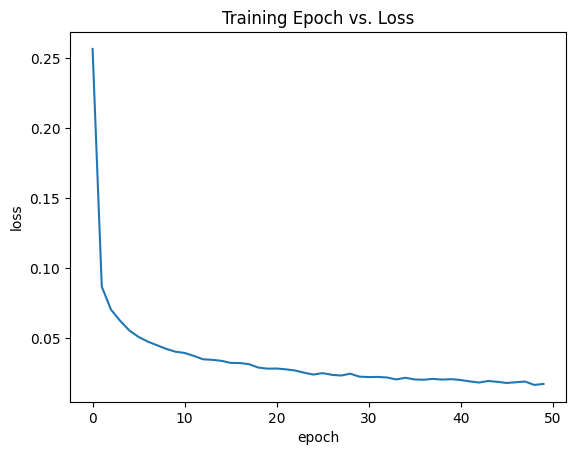

In [72]:
plt.plot(train_results["x"], train_results["y"])
plt.title("Training Epoch vs. Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [73]:
model.eval()

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc): Linear(in_features=800, out_features=10, bias=True)
)

In [74]:
results = {}
train_loss = 0
train_correct = 0

with torch.no_grad():
    for data, target in trainloader:
        data = data.cuda()
        output = model(data)

        target = target.cuda()

        train_loss += criterion(output, target).item()
        pred = output.argmax(dim=1)
        train_correct += pred.eq(target.view_as(pred)).sum().item()

train_loss /= len(trainloader)
train_accuracy = 100. * train_correct / len(trainloader.dataset)

results["train"] = { "accuracy": train_accuracy, "loss": train_loss }

In [75]:
test_loss = 0
test_correct = 0

with torch.no_grad():
    for data, target in testloader:
        data = data.cuda()
        output = model(data)

        target = target.cuda()

        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1)
        test_correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(testloader)
test_accuracy = 100. * test_correct / len(testloader.dataset)

results["test"] = { "accuracy": test_accuracy, "loss": test_loss }

In [68]:
results_df = pd.DataFrame(results)
results_df

,train,test
accuracy,99.801667,99.210000
loss,0.007458,0.024907


In [83]:
torch.save(model.state_dict(), ".")